# Keras ResNet classifier for CIFAR10 test
ResNet network for CIFAR10 network test

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import tensorflow as tf 
from keras import backend as k
import os
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.1
config.gpu_options.allow_growth = True
k.tensorflow_backend.set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# get data
cifar10_data = CIFAR10Data()
x_train, y_train, x_test, y_test = cifar10_data.get_data(subtract_mean=True)

num_train = int(x_train.shape[0] * 0.8)
num_val = x_train.shape[0] - num_train
mask = list(range(num_train, num_train+num_val))
x_val = x_train[mask]
y_val = y_train[mask]

mask = list(range(num_train))
x_train = x_train[mask]
y_train = y_train[mask]

data = (x_train, y_train, x_val, y_val, x_test, y_test)

CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)


## Test with ResNet18
the resnet18 is modified with the standard resnet18 architecture.

In [8]:
from classifiers.ResNet import ResNet18
from keras import losses
from keras import optimizers

weight_decay = 1e-4
lr = 1e-1
num_classes = 10
resnet18 = ResNet18(input_shape=(32, 32, 3), classes=num_classes, weight_decay=weight_decay)
opt = optimizers.SGD(lr=lr, momentum=0.9, nesterov=False)
resnet18.compile(optimizer=opt,
                 loss=losses.categorical_crossentropy,
                 metrics=['accuracy'])
resnet18.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 32, 32, 64)   1728        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, 32, 32, 64)   256         conv2d_21[0][0]                  
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 32, 32, 64)   0           batch_normalization_21[0][0]     
__________________________________________________________________________________________________
conv2d_22 

In [9]:
%%time
from cifar10_solver import *
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    new_lr = lr * (0.1 ** (epoch // 50))
    print('new lr:%.2e' % new_lr)
    return new_lr 

reduce_lr = LearningRateScheduler(lr_scheduler)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=10, min_lr=1e-6, verbose=1)

solver = CIFAR10Solver(resnet18, data)
history = solver.train(epochs=200, batch_size=128, data_augmentation=True, callbacks=[reduce_lr])

train with data augmentation
Epoch 1/200
new lr:1.00e-01
313/313 [==============================] - 66s 211ms/step - loss: 2.9463 - acc: 0.2283 - val_loss: 2.7227 - val_acc: 0.2575
Epoch 2/200
new lr:1.00e-01
313/313 [==============================] - 51s 164ms/step - loss: 2.4275 - acc: 0.3359 - val_loss: 2.4775 - val_acc: 0.2999
Epoch 3/200
new lr:1.00e-01
313/313 [==============================] - 51s 164ms/step - loss: 2.1218 - acc: 0.4174 - val_loss: 1.9242 - val_acc: 0.4655
Epoch 4/200
new lr:1.00e-01
313/313 [==============================] - 50s 161ms/step - loss: 1.7927 - acc: 0.5057 - val_loss: 1.7420 - val_acc: 0.5233
Epoch 5/200
new lr:1.00e-01
313/313 [==============================] - 51s 164ms/step - loss: 1.5642 - acc: 0.5825 - val_loss: 1.4905 - val_acc: 0.6082
Epoch 6/200
new lr:1.00e-01
313/313 [==============================] - 51s 164ms/step - loss: 1.3727 - acc: 0.6454 - val_loss: 1.3739 - val_acc: 0.6371
Epoch 7/200
new lr:1.00e-01
313/313 [======================

313/313 [==============================] - 30s 94ms/step - loss: 0.3330 - acc: 0.9910 - val_loss: 0.5863 - val_acc: 0.9203
Epoch 55/200
new lr:1.00e-02
313/313 [==============================] - 30s 95ms/step - loss: 0.3257 - acc: 0.9922 - val_loss: 0.5810 - val_acc: 0.9215
Epoch 56/200
new lr:1.00e-02
313/313 [==============================] - 29s 93ms/step - loss: 0.3192 - acc: 0.9933 - val_loss: 0.5819 - val_acc: 0.9226
Epoch 57/200
new lr:1.00e-02
313/313 [==============================] - 30s 96ms/step - loss: 0.3129 - acc: 0.9943 - val_loss: 0.5725 - val_acc: 0.9242
Epoch 58/200
new lr:1.00e-02
313/313 [==============================] - 30s 95ms/step - loss: 0.3072 - acc: 0.9948 - val_loss: 0.5761 - val_acc: 0.9239
Epoch 59/200
new lr:1.00e-02
313/313 [==============================] - 30s 96ms/step - loss: 0.3029 - acc: 0.9951 - val_loss: 0.5767 - val_acc: 0.9230
Epoch 60/200
new lr:1.00e-02
313/313 [==============================] - 29s 93ms/step - loss: 0.2972 - acc: 0.9957 - 

Epoch 108/200
new lr:1.00e-03
313/313 [==============================] - 56s 178ms/step - loss: 0.1709 - acc: 0.9997 - val_loss: 0.5291 - val_acc: 0.9277
Epoch 109/200
new lr:1.00e-03
313/313 [==============================] - 56s 179ms/step - loss: 0.1708 - acc: 0.9997 - val_loss: 0.5296 - val_acc: 0.9276
Epoch 110/200
new lr:1.00e-03
313/313 [==============================] - 56s 178ms/step - loss: 0.1707 - acc: 0.9995 - val_loss: 0.5291 - val_acc: 0.9277
Epoch 111/200
new lr:1.00e-03
313/313 [==============================] - 56s 179ms/step - loss: 0.1702 - acc: 0.9997 - val_loss: 0.5285 - val_acc: 0.9280
Epoch 112/200
new lr:1.00e-03
313/313 [==============================] - 56s 178ms/step - loss: 0.1701 - acc: 0.9996 - val_loss: 0.5278 - val_acc: 0.9276
Epoch 113/200
new lr:1.00e-03
313/313 [==============================] - 56s 178ms/step - loss: 0.1700 - acc: 0.9997 - val_loss: 0.5275 - val_acc: 0.9280
Epoch 114/200
new lr:1.00e-03
313/313 [==============================] - 56s

313/313 [==============================] - 55s 177ms/step - loss: 0.1615 - acc: 0.9998 - val_loss: 0.5209 - val_acc: 0.9283
Epoch 162/200
new lr:1.00e-04
313/313 [==============================] - 56s 178ms/step - loss: 0.1614 - acc: 0.9998 - val_loss: 0.5208 - val_acc: 0.9285
Epoch 163/200
new lr:1.00e-04
313/313 [==============================] - 56s 178ms/step - loss: 0.1613 - acc: 0.9998 - val_loss: 0.5210 - val_acc: 0.9283
Epoch 164/200
new lr:1.00e-04
313/313 [==============================] - 56s 179ms/step - loss: 0.1616 - acc: 0.9997 - val_loss: 0.5206 - val_acc: 0.9286
Epoch 165/200
new lr:1.00e-04
313/313 [==============================] - 56s 179ms/step - loss: 0.1614 - acc: 0.9997 - val_loss: 0.5208 - val_acc: 0.9282
Epoch 166/200
new lr:1.00e-04
313/313 [==============================] - 56s 179ms/step - loss: 0.1613 - acc: 0.9998 - val_loss: 0.5208 - val_acc: 0.9286
Epoch 167/200
new lr:1.00e-04
313/313 [==============================] - 56s 179ms/step - loss: 0.1612 - a

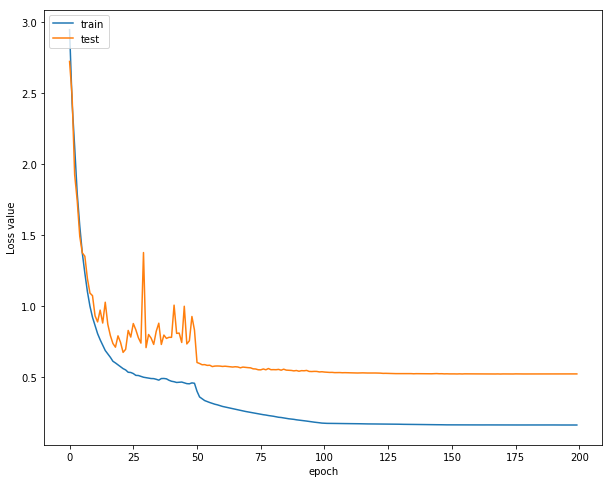

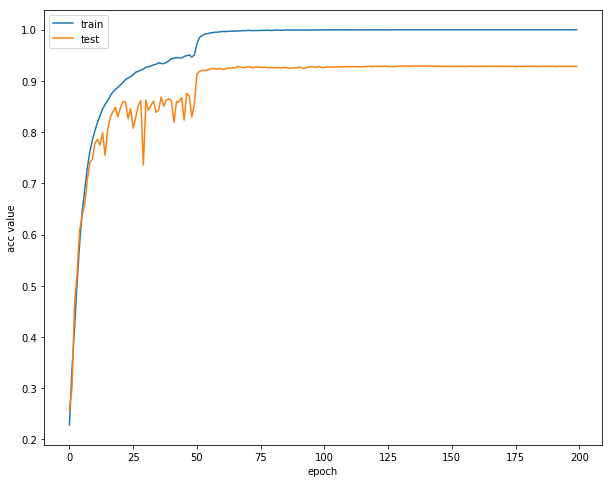

In [10]:
# plot loss and acc 
plot_history(history)

In [11]:
solver.test()

10000/10000 [==============================] - 18s 2ms/step
test data loss:0.56 acc:0.9216
